# Drug recommender system for patients with Breast Cancer indication

In [1]:
from __future__ import division
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from difflib import SequenceMatcher

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Reading the cleaned dataset

In [2]:
df_0=pd.read_csv('fda_breastcancer.csv')
df_0.head()

,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt
0,zometa,74.0,0.0,44.0,jp,0,0,0,0,0,0,1,anaemia
1,zometa,74.0,0.0,44.0,jp,0,0,0,0,0,0,1,aortic valve incompetence
2,zometa,74.0,0.0,44.0,jp,0,0,0,0,0,0,1,breast cancer stage ii
3,zometa,74.0,0.0,44.0,jp,0,0,0,0,0,0,1,gingival bleeding
4,zometa,74.0,0.0,44.0,jp,0,0,0,0,0,0,1,gingival swelling


In [25]:
fff=df[['drugname', 'age']].head(2)
fff.items

<bound method DataFrame.iteritems of   drugname   age
0   zometa  74.0
1   zometa  74.0>

In [44]:
fff.index.name=None
fff.head()

,drugname,age
0,zometa,74.0
1,zometa,74.0


In [37]:
[(v) for k,v in fff.items()]

[0    zometa
 1    zometa
 Name: drugname, dtype: object, 0    74.0
 1    74.0
 Name: age, dtype: float64]

In [3]:
df['drugname'].nunique()

607

In [4]:
df.describe()

,age,gndr_cod,wt,de,lt,ho,ds,ca,ri,ot
count,25769.000000,25769.000000,25769.000000,25769.000000,25769.000000,25769.000000,25769.000000,25769.0,25769.000000,25769.000000
mean,58.577915,0.009546,70.964166,0.097559,0.037293,0.314913,0.024875,0.0,0.001707,0.314719
std,12.011666,0.097240,18.218258,0.296723,0.189482,0.464490,0.155747,0.0,0.041287,0.464413
min,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,51.000000,0.000000,58.960000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,58.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,67.000000,0.000000,80.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000
max,103.000000,1.000000,280.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


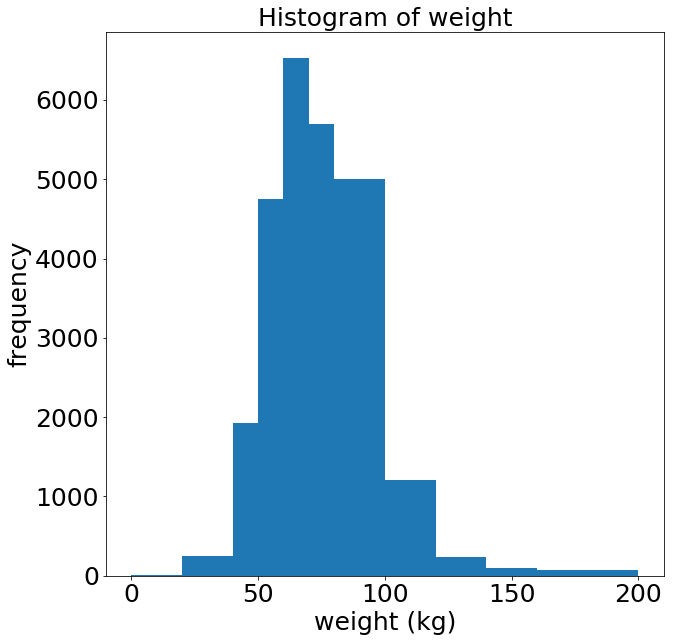

In [38]:
plt.xlabel('weight (kg)') 
plt.ylabel('frequency') 
plt.title('Histogram of weight') 
#df['wt'].hist(figsize=[10,10] ,bins=25)
params = {'axes.titlesize':'25',
          
         'axes.labelsize': '25'}
plt.rcParams.update(params)
df['wt'].hist(figsize=[10,10],bins=[0,20,40,50,60,70,80,100,120,140,160,200])  
plt.grid(False)

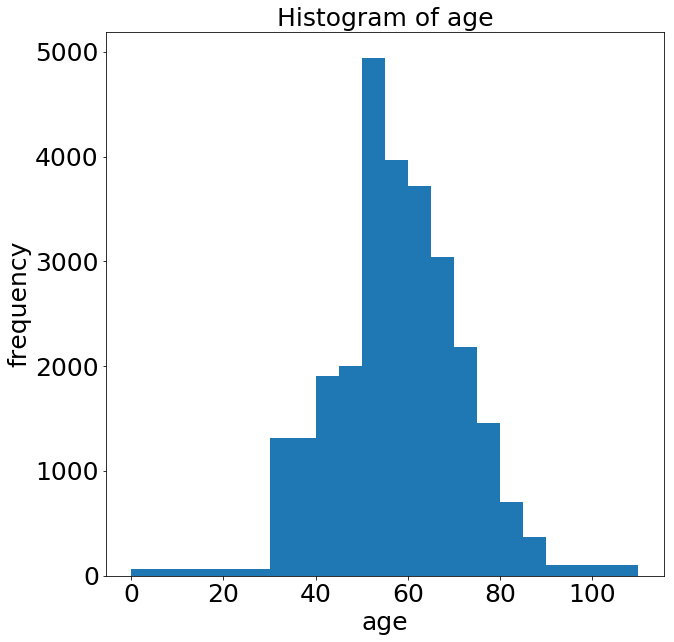

In [36]:
plt.xlabel('age') 
plt.ylabel('frequency') 
plt.title('Histogram of age') 
params = {'axes.titlesize':'25',
          
         'axes.labelsize': '25'}
plt.rcParams.update(params)
df['age'].hist(figsize=[10,10],bins=[0,30,40,45,50,55,60,65,70,75,80,85,90,110])
plt.grid(False)

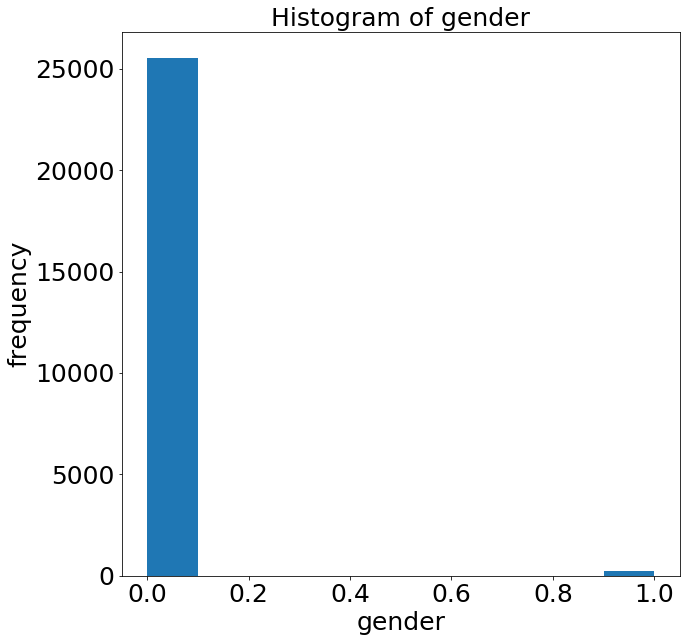

In [37]:
plt.xlabel('gender') 
plt.ylabel('frequency') 
plt.title('Histogram of gender') 
params = {'axes.titlesize':'25',
          
         'axes.labelsize': '25'}
plt.rcParams.update(params)
df['gndr_cod'].hist(figsize=[10,10])
plt.grid(False)

In [6]:
df['reporter_country'].value_counts()

us                                14547
jp                                 2087
de                                 1173
gb                                  972
germany                             969
fr                                  933
ca                                  879
country not specified               424
br                                  413
it                                  273
au                                  261
cn                                  159
belgium                             142
be                                  127
dk                                  113
cl                                  107
es                                   96
italy                                95
kr                                   88
ireland                              88
taiwan, province of china            83
netherlands                          83
nl                                   82
mx                                   77
pt                                   75


In [7]:
df['gndr_cod'].value_counts()

0.0    25523
1.0      246
Name: gndr_cod, dtype: int64

In [5]:
df['pt'].value_counts()

no reaction                                          1256
diarrhoea                                             398
nausea                                                333
dyspnoea                                              321
fatigue                                               316
pyrexia                                               291
vomiting                                              256
febrile neutropenia                                   240
neutropenia                                           237
pain                                                  215
dehydration                                           204
arthralgia                                            188
asthenia                                              184
anaemia                                               177
malaise                                               149
white blood cell count decreased                      148
bone disorder                                         143
pneumonia     

In [4]:
len(df.columns)

13

In [5]:
df.head()

,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt
0,zometa,74.0,0.0,44.0,jp,0,0,0,0,0,0,1,anaemia
1,zometa,74.0,0.0,44.0,jp,0,0,0,0,0,0,1,aortic valve incompetence
2,zometa,74.0,0.0,44.0,jp,0,0,0,0,0,0,1,breast cancer stage ii
3,zometa,74.0,0.0,44.0,jp,0,0,0,0,0,0,1,gingival bleeding
4,zometa,74.0,0.0,44.0,jp,0,0,0,0,0,0,1,gingival swelling


## Data Preprocessing

In [3]:
dummy_col = pd.get_dummies(df_0[['drugname']])
df=df_0.drop(['drugname','reporter_country','pt'] , axis=1)
df = pd.concat([df, dummy_col], axis=1)
df.head()

,age,gndr_cod,wt,de,lt,ho,ds,ca,ri,ot,...,drugname_zoledronate t29581+solinj+bm,drugname_zoledronic acid,drugname_zoledronic acid (manufacturer unknown),"drugname_zoledronsyre, actavis",drugname_zoloft,drugname_zolpidem,drugname_zometa,drugname_zometa (zoledronate) solution for injection,drugname_zometa acid,drugname_zophren
0,74.0,0.0,44.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,74.0,0.0,44.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,74.0,0.0,44.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,74.0,0.0,44.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,74.0,0.0,44.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [6]:
len(df.columns)

617

In [8]:
df.corr()['de'].sort_values()

ho                                    -0.137321
wt                                    -0.050444
ds                                    -0.048315
drugname_ibrance                      -0.044863
drugname_tamoxifen citrate            -0.042616
drugname_tamoxifen                    -0.042172
drugname_femara                       -0.041898
drugname_lapatinib                    -0.038049
drugname_faslodex                     -0.037727
ot                                    -0.034978
drugname_perjeta                      -0.028081
drugname_pertuzumab                   -0.027339
drugname_amisfostine                  -0.024475
drugname_theratope                    -0.022770
drugname_exemestane.                  -0.021953
drugname_adriamycin pfs               -0.021803
drugname_docetaxel.                   -0.021075
drugname_trastuzumab                  -0.019861
drugname_carboplatin.                 -0.019465
drugname_cyclophosphamide.            -0.019191
drugname_doxorubicin hcl              -0

Text(0.5,1,'Selecting k with the Elbow Method')

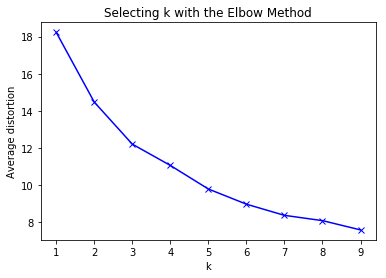

In [6]:
# Clustering to see pattaerns of drugs, age, wt, reactions, ... wihtout outcomes
X=df[['age','wt','gndr_cod']]
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

In [7]:
from sklearn.cluster import KMeans
k_means = KMeans(init='k-means++', n_clusters=5, random_state=0)
k_means.fit(X)
df_cl = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df2 = df.join(df_cl)
df2.head()

,age,wt,de,lt,ho,ds,ca,ri,ot,gndr_cod,...,drugname_zoledronic acid,drugname_zoledronic acid (manufacturer unknown),"drugname_zoledronsyre, actavis",drugname_zoloft,drugname_zolpidem,drugname_zometa,drugname_zometa (zoledronate) solution for injection,drugname_zometa acid,drugname_zophren,cluster
0,74.0,44.0,0,0,0,0,0,0,1,0.0,...,0,0,0,0,0,1,0,0,0,3
1,74.0,44.0,0,0,0,0,0,0,1,0.0,...,0,0,0,0,0,1,0,0,0,3
2,74.0,44.0,0,0,0,0,0,0,1,0.0,...,0,0,0,0,0,1,0,0,0,3
3,74.0,44.0,0,0,0,0,0,0,1,0.0,...,0,0,0,0,0,1,0,0,0,3
4,74.0,44.0,0,0,0,0,0,0,1,0.0,...,0,0,0,0,0,1,0,0,0,3


In [8]:
df2['cluster'].value_counts()

0    7649
3    6636
1    5569
2    4727
4    1188
Name: cluster, dtype: int64

In [24]:
df2.corr()['de'].sort_values()

ho                                    -0.131645
drugname_tamoxifen citrate            -0.049988
drugname_tamoxifen                    -0.048661
ds                                    -0.048325
drugname_lapatinib                    -0.040179
drugname_femara                       -0.035361
drugname_faslodex                     -0.034233
ot                                    -0.030189
drugname_amisfostine                  -0.028821
drugname_pertuzumab                   -0.028581
gndr_cod                              -0.027245
drugname_theratope                    -0.026810
drugname_ibrance                      -0.026320
drugname_docetaxel.                   -0.026058
wt                                    -0.024738
drugname_trastuzumab                  -0.023977
drugname_carboplatin.                 -0.022784
drugname_letrozole                    -0.022000
drugname_cyclophosphamide.            -0.021422
drugname_megace                       -0.021324
drugname_perjeta                      -0

In [9]:
df2[df2['cluster']==0].corr()['de'].sort_values(ascending=False).head(10)

de                               1.000000
drugname_zometa                  0.246045
age                              0.144433
drugname_aredia                  0.109159
drugname_aromasin                0.096235
drugname_arimidex                0.087387
drugname_vinflunine              0.075473
drugname_cgs 20267 t30748+tab    0.071994
drugname_capecitabine            0.070327
drugname_taxol                   0.069502
Name: de, dtype: float64

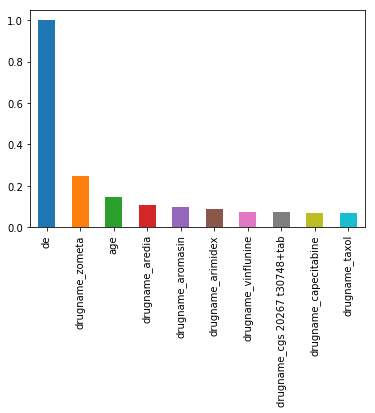

In [10]:
df2[df2['cluster']==0].corr()['de'].sort_values(ascending=False).head(10).plot.bar()

In [11]:
df2[df2['cluster']==1].corr()['de'].sort_values(ascending=False)

de                                                                                1.000000
drugname_nolvadex                                                                 0.281181
drugname_navelbine                                                                0.247651
drugname_aromasine                                                                0.188432
drugname_cyclophosphamide                                                         0.177136
drugname_chlorambucil                                                             0.136747
drugname_paclitaxel sandoz                                                        0.136747
drugname_ixempra kit                                                              0.101537
drugname_cyclophosphamid                                                          0.100949
drugname_vinorelbine                                                              0.098716
drugname_ultravist                                                                0.082409

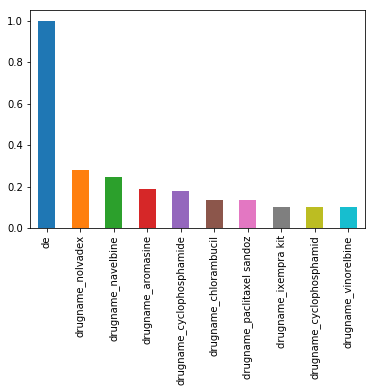

In [12]:
df2[df2['cluster']==1].corr()['de'].sort_values(ascending=False).head(10).plot.bar()

In [13]:
df2[df2['cluster']==2].corr()['de'].sort_values(ascending=False)

de                                                                         1.000000
drugname_farmorubicin                                                      0.137635
drugname_abraxane (paclitaxel)                                             0.134320
drugname_hysron                                                            0.126557
drugname_cgs 20267 t30748+tab                                              0.117818
drugname_xeloda                                                            0.113170
drugname_furtulon                                                          0.093041
drugname_erlotinib hydrochloride                                           0.089499
drugname_mitoxantrone hydrochloride                                        0.077501
drugname_morphine sulfate                                                  0.077501
drugname_topotecan                                                         0.073877
drugname_cgs 20267 t30748+                                                 0

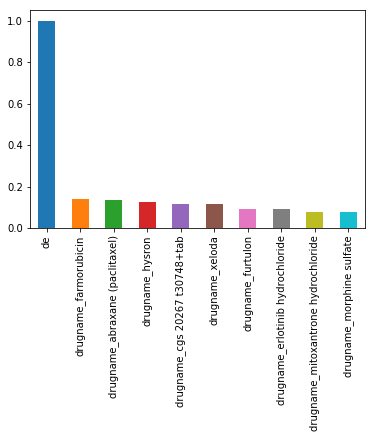

In [17]:
df2[df2['cluster']==2].corr()['de'].sort_values(ascending=False).head(10).plot.bar()

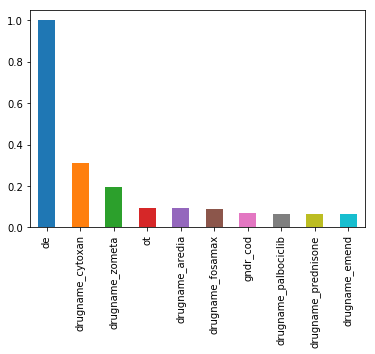

In [18]:
df2[df2['cluster']==3].corr()['de'].sort_values(ascending=False).head(10).plot.bar()

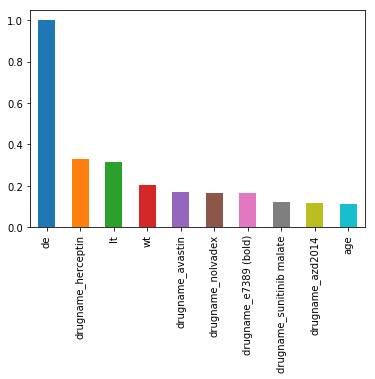

In [19]:
df2[df2['cluster']==4].corr()['de'].sort_values(ascending=False).head(10).plot.bar()

## Model Building

In [ ]:
len(X)

In [ ]:
y.value_counts()

In [32]:
y=df['de']
X=df.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf1 = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1)    #building 100 decision trees
clf1.fit(X_train, y_train)
print "Death model"
print "Random Forest"
print metrics.accuracy_score(y_test, clf1.predict(X_test))
print metrics.confusion_matrix(y_test, clf1.predict(X_test))
print metrics.classification_report(y_test, clf1.predict(X_test))
print metrics.roc_auc_score(y_test, clf1.predict(X_test))
TP=metrics.confusion_matrix(y_test, clf1.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, clf1.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, clf1.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, clf1.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)

Death model
Random Forest
0.962359332557237
[[2256   70]
 [  27  224]]
             precision    recall  f1-score   support

          0       0.99      0.97      0.98      2326
          1       0.76      0.89      0.82       251

avg / total       0.97      0.96      0.96      2577

0.9311678479546988
Sensitivity= 0.9699054170249355
Specificity= 0.8924302788844621


In [33]:
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')    #building 20 decision trees
scores = cross_val_score(clf1, X, y, scoring='accuracy', cv=10)
clf.fit(X, y)
print scores
print scores.mean()

[0.89410396 0.89992242 0.87975175 0.84949573 0.85137757 0.88354037
 0.79153727 0.83889752 0.82414596 0.89906832]
0.8611840867514664


In [28]:
y=df['de']
X=df.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)
print "Death model"
print "Decision Tree"
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))
TP=metrics.confusion_matrix(y_test, dt.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, dt.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, dt.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, dt.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)

Death model
Decision Tree
0.9573147070236709
[[2241   85]
 [  25  226]]
             precision    recall  f1-score   support

          0       0.99      0.96      0.98      2326
          1       0.73      0.90      0.80       251

avg / total       0.96      0.96      0.96      2577

0.9319274920952476
Sensitivity= 0.9634565778159931
Specificity= 0.900398406374502


In [34]:
scores = cross_val_score(dt, X, y, scoring='accuracy', cv=10)
dt.fit(X, y)
print scores
print scores.mean()

[0.8382467  0.82544608 0.82893716 0.79868115 0.86224292 0.83501553
 0.72593168 0.86568323 0.75815217 0.85830745]
0.8196644074104865


In [29]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
print "Death model"
print "Logistic Regression"
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))
TP=metrics.confusion_matrix(y_test, lr.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, lr.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, lr.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, lr.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)

Death model
Logistic Regression
0.6686069072564998
[[1529  797]
 [  57  194]]
             precision    recall  f1-score   support

          0       0.96      0.66      0.78      2326
          1       0.20      0.77      0.31       251

avg / total       0.89      0.67      0.74      2577

0.7151300216160295
Sensitivity= 0.6573516766981943
Specificity= 0.7729083665338645


In [36]:
lr.fit(X, y)
scores = cross_val_score(lr, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.73467804 0.67222653 0.6939488  0.58417378 0.51649205 0.63975155
 0.58152174 0.55667702 0.59006211 0.63703416]
0.6206565781696166


In [30]:
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
svc.fit(X_train, y_train)
print "Death model"
print "SVM"
print metrics.accuracy_score(y_test, svc.predict(X_test))
print metrics.confusion_matrix(y_test, svc.predict(X_test))
print metrics.classification_report(y_test, svc.predict(X_test))
print metrics.roc_auc_score(y_test, svc.predict(X_test))
TP=metrics.confusion_matrix(y_test, svc.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, svc.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, svc.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, svc.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)

Death model
SVM
0.6426076833527358
[[1465  861]
 [  60  191]]
             precision    recall  f1-score   support

          0       0.96      0.63      0.76      2326
          1       0.18      0.76      0.29       251

avg / total       0.88      0.64      0.72      2577

0.6953964023527558
Sensitivity= 0.6298366294067068
Specificity= 0.7609561752988048


In [37]:
svc.fit(X, y)
scores = cross_val_score(svc, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.65593483 0.5806827  0.63072149 0.57913111 0.58129608 0.60753106
 0.48563665 0.5617236  0.5628882  0.54347826]
0.5789023976574346


In [31]:
svc = SVC(class_weight='balanced', random_state=0)
svc.fit(X_train, y_train)
print "Death model"
print "SVM"
print metrics.accuracy_score(y_test, svc.predict(X_test))
print metrics.confusion_matrix(y_test, svc.predict(X_test))
print metrics.classification_report(y_test, svc.predict(X_test))
print metrics.roc_auc_score(y_test, svc.predict(X_test))
TP=metrics.confusion_matrix(y_test, svc.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, svc.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, svc.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, svc.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)

Death model
SVM
0.5937136204889406
[[1326 1000]
 [  47  204]]
             precision    recall  f1-score   support

          0       0.97      0.57      0.72      2326
          1       0.17      0.81      0.28       251

avg / total       0.89      0.59      0.67      2577

0.6914131950272855
Sensitivity= 0.5700773860705073
Specificity= 0.8127490039840638


In [4]:
y=df['de']
X=df.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf1 = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=0)    #building 100 decision trees
clf1.fit(X_train, y_train)
print "Death model"
#print "oob score:", clf1.oob_score_
print metrics.accuracy_score(y_test, clf1.predict(X_test))

print metrics.confusion_matrix(y_test, clf1.predict(X_test))
TP=metrics.confusion_matrix(y_test, clf1.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, clf1.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, clf1.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, clf1.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)
clf1.fit(X, y)
scores = cross_val_score(clf1, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()
print "======================================================="
y=df['lt']
X=df.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf2 = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=0)    #building 100 decision trees
clf2.fit(X_train, y_train)
print "Life threating model"
#print "oob score:", clf2.oob_score_
print metrics.accuracy_score(y_test, clf2.predict(X_test))

print metrics.confusion_matrix(y_test, clf2.predict(X_test))
TP=metrics.confusion_matrix(y_test, clf2.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, clf2.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, clf2.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, clf2.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)
clf2.fit(X, y)
scores = cross_val_score(clf2, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()
print "======================================================="

y=df['ho']
X=df.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf3 = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=0)    #building 100 decision trees
clf3.fit(X_train, y_train)
print "Hospitalization model"
#print "oob score:", clf3.oob_score_
print metrics.accuracy_score(y_test, clf3.predict(X_test))

print metrics.confusion_matrix(y_test, clf3.predict(X_test))
TP=metrics.confusion_matrix(y_test, clf3.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, clf3.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, clf3.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, clf3.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)
clf3.fit(X, y)
scores = cross_val_score(clf3, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()
print "======================================================="

y=df['ds']
X=df.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf4 = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=0)    #building 100 decision trees
clf4.fit(X_train, y_train)
print "Disability model"
#print "oob score:", clf4.oob_score_
print metrics.accuracy_score(y_test, clf4.predict(X_test))

print metrics.confusion_matrix(y_test, clf4.predict(X_test))
TP=metrics.confusion_matrix(y_test, clf4.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, clf4.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, clf4.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, clf4.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)
clf4.fit(X, y)
scores = cross_val_score(clf4, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()
print "======================================================="

y=df['ot']
X=df.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf5 = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=0)    #building 100 decision trees
clf5.fit(X_train, y_train)
print "Other Serious issues model"
#print "oob score:", clf5.oob_score_
print metrics.accuracy_score(y_test, clf5.predict(X_test))

print metrics.confusion_matrix(y_test, clf5.predict(X_test))
TP=metrics.confusion_matrix(y_test, clf5.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, clf5.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, clf5.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, clf5.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)
clf5.fit(X, y)
scores = cross_val_score(clf5, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()
print "======================================================="

X_test=X_test.reset_index(drop=True)

Death model
0.9627473806752037
[[2255   71]
 [  25  226]]
Sensitivity= 0.969475494411006
Specificity= 0.900398406374502
[0.89255237 0.89992242 0.87781226 0.84871994 0.85060147 0.86451863
 0.79153727 0.84006211 0.82802795 0.89440994]
0.8588164357360677
Life threating model
0.9879705083430346
[[2468   13]
 [  18   78]]
Sensitivity= 0.9947601773478436
Specificity= 0.8125
[0.95500388 0.94800155 0.96197128 0.96818005 0.94800155 0.97012029
 0.9491657  0.96429957 0.96040373 0.95302795]
0.9578175563755547
Hospitalization model
0.9057043073341094
[[1625  140]
 [ 103  709]]
Sensitivity= 0.9206798866855525
Specificity= 0.8731527093596059
[0.65709853 0.65205586 0.61598138 0.66795966 0.66123399 0.60326087
 0.65295031 0.64013975 0.6253882  0.6556677 ]
0.6431736248121649
Disability model
0.9934031819945673
[[2505    8]
 [   9   55]]
Sensitivity= 0.996816553919618
Specificity= 0.859375
[0.9681924  0.97516492 0.96546372 0.97283663 0.96818005 0.97477687
 0.98176174 0.97788126 0.97748447 0.9697205 ]
0.97

In [26]:
y=df['de']
X=df.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf1 = RandomForestClassifier(n_estimators=100, class_weight='balanced')    #building 100 decision trees
clf1.fit(X_train, y_train)
print "Death model"
print metrics.accuracy_score(y_test, clf1.predict(X_test))

print metrics.confusion_matrix(y_test, clf1.predict(X_test))

Death model
0.9635234769111369
[[2258   68]
 [  26  225]]


In [33]:
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
svc.fit(X_resampled, y_resampled)
print metrics.accuracy_score(y_test, svc.predict(X_test))
print metrics.confusion_matrix(y_test, svc.predict(X_test))

0.6426076833527358
[[1465  861]
 [  60  191]]


In [28]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='tanh' ,solver='lbfgs', alpha=1e-5, random_state=1)
clf.fit(X_resampled, y_resampled)
print metrics.accuracy_score(y_test, clf.predict(X_test))

print metrics.confusion_matrix(y_test, clf.predict(X_test))

0.9041521148622429
[[2313   13]
 [ 234   17]]


In [27]:
from imblearn.under_sampling import TomekLinks
X_resampled, y_resampled = TomekLinks(ratio='not minority').fit_sample(X_train, y_train)
#X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=0, stratify=y)
clf1 = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=0, oob_score=True)    #building 50 decision trees
clf1.fit(X_resampled, y_resampled)
print "Death model"
print "oob score:", clf1.oob_score_
print metrics.accuracy_score(y_test, clf1.predict(X_test))

print metrics.confusion_matrix(y_test, clf1.predict(X_test))

Death model
oob score: 0.9677892918825561
0.9631354287931704
[[2256   70]
 [  25  226]]


In [12]:
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')    #building 20 decision trees
scores = cross_val_score(clf, X, y, scoring='f1', cv=10)
clf.fit(X, y)
print scores
print scores.mean()

[0.16744186 0.05633803 0.0167364  0.29649596 0.25316456 0.26548673
 0.35412475 0.66666667 0.03550296 0.02020202]
0.21321599237463423


In [13]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [14]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [15]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [16]:
grid_search_wrapper()

Best params for precision_score
{'max_features': 10, 'min_samples_split': 5, 'n_estimators': 100, 'max_depth': 25}

Confusion matrix of Random Forest optimized for precision_score on the test data:
     pred_neg  pred_pos
neg      2159         0
pos        87         8


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 10], 'n_estimators': [100, 300], 'max_depth': [3, 5, 15, 25], 'max_features': [3, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit='precision_score',
       return_train_score=True,
       scoring={'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'precision_score': make_scorer(precision_score)},
       verbose=0)

## Function creating

In [13]:
def drug_recommender(age,wt,gndr):
    w1=9
    w2=7
    w3=5
    w4=3
    w5=1

    x=np.zeros(X_test.loc[0].shape)
    out=pd.DataFrame(columns={'drug','score'})
    min_prob=1000
    min_prob_i=3
    for i in range(3,365):
        x = np.zeros(x.shape)
        x[0]=age
        x[1]=wt
        x[2]=gndr
        x[i]=1
        pred=w1*clf1.predict_proba(x.reshape(1, -1))[0][1]+w2*clf2.predict_proba(x.reshape(1, -1))[0][1]+w3*clf3.predict_proba(x.reshape(1, -1))[0][1]+w4*clf4.predict_proba(x.reshape(1, -1))[0][1]+w5*clf5.predict_proba(x.reshape(1, -1))[0][1]
        prob=pred
        if prob <= min_prob:
            min_prob=prob
            min_prob_i=i
        out=out.append(pd.DataFrame({'drug':[X_test.columns[i]],'score':[pred]}))
    out=out.sort_values(['score'])
    print "Recommended Drug:" ,X_test.columns[min_prob_i].replace("drugname_", "")
    print "=============================================="
    return out.head()

In [20]:
def drug_recommender2(age,wt,gndr):
    x=np.zeros(X_test.loc[0].shape)
    out=pd.DataFrame(columns={'drug','score'})
    #min_prob=10000
    #min_prob_i=3
    for i in range(3,365):
        x = np.zeros(x.shape)
        prob=0.0
        x[0]=age
        x[1]=wt
        x[2]=gndr
        x[i]=1
        val1=clf1.predict_proba(x.reshape(1, -1))[0][1]
        val2=clf2.predict_proba(x.reshape(1, -1))[0][1]
        val3=clf3.predict_proba(x.reshape(1, -1))[0][1]
        val4=clf4.predict_proba(x.reshape(1, -1))[0][1]
        val5=clf5.predict_proba(x.reshape(1, -1))[0][1]
        for j in range(0,50):
            w1=round(np.random.triangular(5,9,10))
            w2=round(np.random.triangular(5,7,10))
            w3=round(np.random.triangular(3,5,7))
            w4=round(np.random.triangular(1,3,5))
            w5=round(np.random.triangular(1,1,5))
            pred=(w1*val1+w2*val2+w3*val3+w4*val4+w5*val5)
            prob=prob+pred
        #if prob <= min_prob:
        #    min_prob=prob
        #    min_prob_i=i
        out=out.append(pd.DataFrame({'drug':[X_test.columns[i]],'score':[prob/50]}))
    out=out.sort_values(['score'])
    out['drug']=out['drug'].str.replace("drugname_", "")
    #print "Recommended Drug:" ,X_test.columns[min_prob_i].replace("drugname_", "")
    print "=============================================="
    return out.head()

In [14]:
df.head()

,age,gndr_cod,wt,de,lt,ho,ds,ca,ri,ot,...,drugname_zoledronate t29581+solinj+bm,drugname_zoledronic acid,drugname_zoledronic acid (manufacturer unknown),"drugname_zoledronsyre, actavis",drugname_zoloft,drugname_zolpidem,drugname_zometa,drugname_zometa (zoledronate) solution for injection,drugname_zometa acid,drugname_zophren
0,74.0,0.0,44.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,74.0,0.0,44.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,74.0,0.0,44.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,74.0,0.0,44.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,74.0,0.0,44.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.to_string(index=False)

## Testing

In [44]:
drug_recommender(58,78,0)

Recommended Drug: endoxan


,drug,score
0,drugname_endoxan,0.059437
0,drugname_adriamycin pfs,0.076091
0,drugname_fluorouracil,0.084761
0,drugname_exemestane.,0.086331
0,drugname_cytoxan,0.089831


In [45]:
drug_recommender(75,80,0)

Recommended Drug: endoxan


,drug,score
0,drugname_endoxan,0.060820
0,drugname_exemestane.,0.077519
0,drugname_adriamycin pfs,0.081289
0,drugname_anastrozole,0.083589
0,drugname_arimidex,0.085519


In [46]:
drug_recommender(45,70,1)

Recommended Drug: cytoxan


,drug,score
0,drugname_cytoxan,0.075000
0,drugname_bevacizumab,0.083282
0,drugname_ibrance,0.084000
0,drugname_doxorubicin,0.085500
0,drugname_exemestane.,0.087500


In [47]:
drug_recommender(80,60,0)

Recommended Drug: endoxan


,drug,score
0,drugname_endoxan,0.070150
0,drugname_arimidex,0.078505
0,drugname_adriamycin pfs,0.093317
0,drugname_gemzar,0.093450
0,drugname_exemestane.,0.103514


In [14]:
%%time
drug_recommender(20,57,0)

Recommended Drug: cytoxan
Wall time: 4min 17s


,drug,score
0,drugname_cytoxan,1.87
0,drugname_endoxan,2.04
0,drugname_bevacizumab,2.05
0,drugname_aromasin,2.06
0,drugname_adriamycin pfs,2.06


## Testing new function (with Simulation)

In [13]:
%%time
drug_recommender2(20,57,0)

Recommended Drug: (carboplatin)
Wall time: 19min 35s


,drug,score
0,drugname_(carboplatin),4.45
0,drugname_(docetaxel),9.43
0,drugname_(paclitaxel),14.75
0,drugname_*capecitabine,19.18
0,drugname_*paclitaxel,24.12


In [21]:
%%time
drug_recommender2(20,57,0)

Wall time: 4min 1s


,drug,score
0,aromasin,2.4102
0,bevacizumab,2.4556
0,endoxan,2.6284
0,cytoxan,2.7214
0,doxorubicin,2.9660


In [5]:
age=20
wt=57
gndr=0
x=np.zeros(X_test.loc[0].shape)
out=pd.DataFrame(columns={'drug','score'})
#min_prob=10000
#min_prob_i=3
for i in range(3,365):
    x = np.zeros(x.shape)
    prob=0.0
    x[0]=age
    x[1]=wt
    x[2]=gndr
    x[i]=1
    val1=clf1.predict_proba(x.reshape(1, -1))[0][1]
    val2=clf2.predict_proba(x.reshape(1, -1))[0][1]
    val3=clf3.predict_proba(x.reshape(1, -1))[0][1]
    val4=clf4.predict_proba(x.reshape(1, -1))[0][1]
    val5=clf5.predict_proba(x.reshape(1, -1))[0][1]
    for j in range(0,50):
        w1=round(np.random.triangular(5,9,10))
        w2=round(np.random.triangular(5,7,10))
        w3=round(np.random.triangular(3,5,7))
        w4=round(np.random.triangular(1,3,5))
        w5=round(np.random.triangular(1,1,5))
        pred=(w1*val1+w2*val2+w3*val3+w4*val4+w5*val5)
        prob=prob+pred
    #if prob <= min_prob:
    #    min_prob=prob
    #    min_prob_i=i
    out=out.append(pd.DataFrame({'drug':[X_test.columns[i]],'score':[prob/50]}))
out=out.sort_values(['score'])
out['drug']=out['drug'].str.replace("drugname_", "")
#print "Recommended Drug:" ,X_test.columns[min_prob_i].replace("drugname_", "")
print "=============================================="
print (out.head(10))

             drug   score
0     bevacizumab  2.4406
0        aromasin  2.4566
0         cytoxan  2.5656
0         endoxan  2.5928
0     doxorubicin  2.8898
0    fluorouracil  3.0136
0     carboplatin  3.1320
0     exemestane.  3.1450
0  adriamycin pfs  3.1730
0         ibrance  3.1960


In [6]:
out.head()

,drug,score
0,bevacizumab,2.4406
0,aromasin,2.4566
0,cytoxan,2.5656
0,endoxan,2.5928
0,doxorubicin,2.8898


In [15]:
out=out.reset_index(drop=True)
out.head()

,drug,score
0,bevacizumab,2.4406
1,aromasin,2.4566
2,cytoxan,2.5656
3,endoxan,2.5928
4,doxorubicin,2.8898


In [16]:
out['drug'][0]

'bevacizumab'

In [17]:
df_1=df_0[df_0['pt']!='no reaction'].reset_index(drop=True)
df_1[df_1['drugname']==out['drug'][0]]['pt']

437                             visual impairment
536                                     diarrhoea
537                                         ileus
538                                      vomiting
539                         drug hypersensitivity
918                                tooth disorder
927                                       aphasia
1011                         brain stem ischaemia
1365                 supraventricular tachycardia
1408        general physical health deterioration
1935                                   haematuria
1952                                 hepatic pain
2202        general physical health deterioration
2203                                    diarrhoea
2278                                      abscess
2279                                 haematemesis
2551                   noninfective sialoadenitis
2576                      pericardial haemorrhage
3115                                      aphasia
3116                    cerebral artery occlusion


In [18]:
df_1.head()

,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt
0,zometa,74.0,0.0,44.0,jp,0,0,0,0,0,0,1,anaemia
1,zometa,74.0,0.0,44.0,jp,0,0,0,0,0,0,1,aortic valve incompetence
2,zometa,74.0,0.0,44.0,jp,0,0,0,0,0,0,1,breast cancer stage ii
3,zometa,74.0,0.0,44.0,jp,0,0,0,0,0,0,1,gingival bleeding
4,zometa,74.0,0.0,44.0,jp,0,0,0,0,0,0,1,gingival swelling


In [19]:
dr=out.head(10)['drug']

In [20]:
len(dr)

10

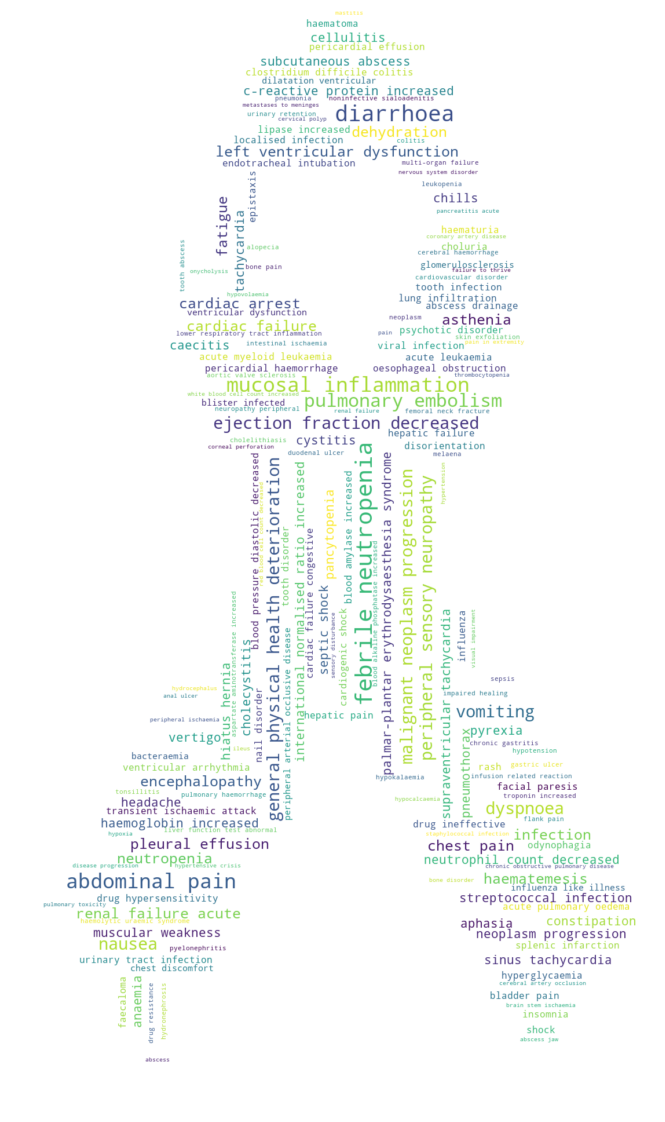

In [65]:
d = {}
for a, x in df_1[df_1['drugname']==out['drug'][0]]['pt'].value_counts().reset_index().values:
    d[a] = x

import requests
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#"http://www.pngall.com/breast-cancer-ribbon-png/download/18609"

mask = np.array(Image.open(requests.get("http://www.pngall.com/wp-content/uploads/2017/11/Breast-Cancer-Ribbon-PNG-File.png", stream=True).raw))
#mask = np.array(Image.open('mask.png'))
wordcloud = WordCloud(max_font_size=40, relative_scaling=0.5, width=800, height=400, mask=mask, background_color='white')
wordcloud.generate_from_frequencies(frequencies=d)
#plt.figure()
plt.figure(figsize=(50,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.savefig('foo.png')
plt.show()

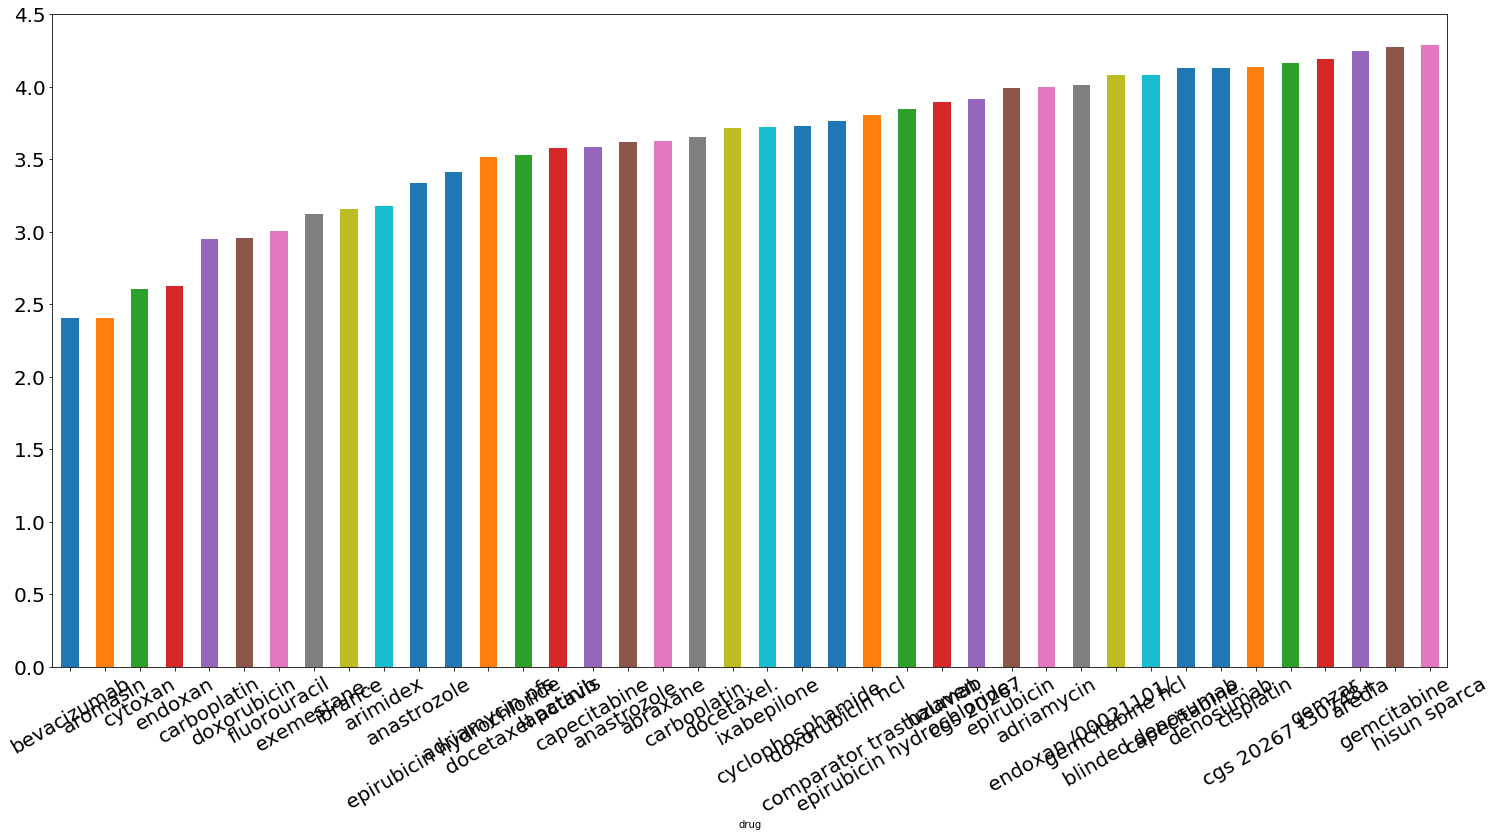

In [137]:
out.head(40).plot(kind='bar',x='drug', y='score',figsize=(25,12),fontsize=20, legend=False, rot=30 )
#plt.savefig('barplot.png')
plt.show()

In [126]:
z = out['drug'].map(fff, na_action=None)
z

0               Bevacizumab
1                  Aromasin
2                   Cytoxan
3                   Endoxan
4               Carboplatin
5               Doxorubicin
6              Fluorouracil
7               Exemestane.
8                   Ibrance
9                  Arimidex
10              Anastrozole
11     Epirubicin Hydrochlo
12           Adriamycin Pfs
13        Docetaxel Actavis
14                Lapatinib
15             Capecitabine
16             Anastrozole.
17                 Abraxane
18             Carboplatin.
19               Docetaxel.
20              Ixabepilone
21        Cyclophosphamide.
22          Doxorubicin Hcl
23     Comparator Trastuzum
24     Epirubicin Hydrochlo
25                  Halaven
26                Cgs 20267
27               Epirubicin
28               Adriamycin
29       Endoxan /00021101/
               ...         
332    Endoxan 1000 Mg, Pou
333           Fluorouracil.
334    Chemotherapeutics No
335             Epirubicine
336    Evening Primr

## Adding DrugBank info to the models

In [105]:
import re
import requests
from lxml import html
import time

In [106]:
dfb=pd.read_csv('df2_all.csv',low_memory=False)
dfb.loc[dfb['reporter_country'].isnull(), 'reporter_country']='country not specified'
dfb=dfb.drop([0]).reset_index(drop=True)
dfb.head()

,primaryid,drug_seq,caseid,indi_pt,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt,drugbank_ID
0,100033001,1.0,10003300.0,osteoporosis,boniva,77.0,0.0,NaN,us,0.0,0.0,0.0,1.0,0.0,0.0,0.0,arthralgia,DB00710
1,100033001,1.0,10003300.0,osteoporosis,boniva,77.0,0.0,NaN,us,0.0,0.0,0.0,1.0,0.0,0.0,0.0,headache,DB00710
2,100033062,1.0,10003306.0,product used for unknown indication,letairis,68.0,0.0,NaN,us,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cough,DB06403
3,100033072,2.0,10003307.0,connective tissue disorder,letairis,NaN,NaN,NaN,country not specified,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rhinorrhoea,DB06403
4,100033083,2.0,10003308.0,systemic sclerosis,letairis,59.0,0.0,NaN,us,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unevaluable event,DB06403


In [115]:
df_s=dfb[dfb['pt']!='no reaction'][['drugname','pt']]
df_s.to_csv('df_s.csv',index=False)

In [116]:
df_s[df_s['drugname']=='zometa']['pt'].value_counts()

osteonecrosis of jaw                  1107
osteonecrosis                         1056
pain                                   909
bone disorder                          789
tooth extraction                       592
anxiety                                571
osteomyelitis                          557
pain in jaw                            549
back pain                              419
fatigue                                417
injury                                 408
dyspnoea                               403
anaemia                                402
impaired healing                       394
arthralgia                             359
metastases to bone                     330
pyrexia                                325
osteoarthritis                         321
diarrhoea                              308
infection                              293
fall                                   292
primary sequestrum                     290
asthenia                               283
pneumonia  

In [86]:
dfb[dfb['indi_pt'].str.contains('breast cancer', na=False)]['indi_pt'].value_counts()

breast cancer                                75888
breast cancer metastatic                     30484
breast cancer female                          5101
her-2 positive breast cancer                  4120
breast cancer recurrent                       1584
breast cancer stage iv                        1264
breast cancer stage ii                         484
breast cancer stage iii                        363
triple negative breast cancer                  346
breast cancer stage i                          247
oestrogen receptor positive breast cancer      222
breast cancer in situ                          155
breast cancer male                             135
metastatic breast cancer                        48
node-negative breast cancer                      5
invasive ductal breast cancer                    3
advanced breast cancer                           3
infiltrating ductal breast cancer                2
breast cancer nos                                1
Name: indi_pt, dtype: int64

In [87]:
dfb2=dfb[dfb['indi_pt'].str.contains('breast cancer', na=False)].drop(['primaryid','drug_seq','caseid','indi_pt'], axis=1).reset_index(drop=True)
dfb2.head()

,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt,drugbank_ID
0,adriamycin,NaN,NaN,NaN,country not specified,0.0,0.0,0.0,0.0,0.0,0.0,1.0,asthenia,DB00997
1,adriamycin,NaN,NaN,NaN,country not specified,0.0,0.0,0.0,0.0,0.0,0.0,1.0,myalgia,DB00997
2,adriamycin,NaN,NaN,NaN,country not specified,0.0,0.0,0.0,0.0,0.0,0.0,1.0,neuropathy peripheral,DB00997
3,adriamycin,NaN,NaN,NaN,country not specified,0.0,0.0,0.0,0.0,0.0,0.0,1.0,skin toxicity,DB00997
4,abraxane,NaN,NaN,NaN,country not specified,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no reaction,DB01229


In [88]:
len(dfb2)

120455

In [89]:
len(dfb2.dropna())

27111

In [91]:
dfb2=dfb2.dropna().reset_index(drop=True)

In [92]:
dfb2.to_csv('fda_breastcancer_withID.csv', index=False)

In [95]:
dfb2=pd.read_csv('fda_breastcancer_withID.csv')
dfb2.head()

,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt,drugbank_ID
0,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399
1,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,aortic valve incompetence,DB00399
2,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,breast cancer stage ii,DB00399
3,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,gingival bleeding,DB00399
4,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,gingival swelling,DB00399


In [96]:
dfb2['target']=None
dfb2['pathway']=None
dfb2['Class']=None

In [97]:
for i in range(len(dfb2)):
    webpage="https://www.drugbank.ca/drugs/" + dfb2['drugbank_ID'][i]
    r = requests.get(webpage)
    data = html.fromstring(r.text)
    dfb2['target'][i] = data.xpath("//*[@id='drug-moa-target-table']/tbody/tr/td[1]/a/text()")
    dfb2['pathway'][i]= data.xpath("//*[@id='drug-pathways']/tbody/tr/td[1]/a/text()")
    dfb2['Class'][i]= data.xpath("/html/body/main/div/div[4]/dl[9]/dd[5]/a/text()")
    time.sleep(0.5)

In [98]:
dfb2.head()

,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt,drugbank_ID,target,pathway,Class
0,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,"[Farnesyl pyrophosphate synthase, Geranylgeran...",[Zoledronate Action Pathway],[Bisphosphonates]
1,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,aortic valve incompetence,DB00399,"[Farnesyl pyrophosphate synthase, Geranylgeran...",[Zoledronate Action Pathway],[Bisphosphonates]
2,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,breast cancer stage ii,DB00399,"[Farnesyl pyrophosphate synthase, Geranylgeran...",[Zoledronate Action Pathway],[Bisphosphonates]
3,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,gingival bleeding,DB00399,"[Farnesyl pyrophosphate synthase, Geranylgeran...",[Zoledronate Action Pathway],[Bisphosphonates]
4,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,gingival swelling,DB00399,"[Farnesyl pyrophosphate synthase, Geranylgeran...",[Zoledronate Action Pathway],[Bisphosphonates]


In [99]:
dfb2.to_csv('dfb2.csv', index=False)

In [100]:
s=dfb2.apply(lambda x: pd.Series(x['target']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'target'
dfb2=dfb2.drop('target', axis=1).join(s)

In [101]:
p=dfb2.apply(lambda x: pd.Series(x['pathway']),axis=1).stack().reset_index(level=1, drop=True)
p.name = 'pathway'
dfb2=dfb2.drop('pathway', axis=1).join(p)

In [102]:
dfb2.head()

,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt,drugbank_ID,Class,target,pathway
0,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,[Bisphosphonates],Farnesyl pyrophosphate synthase,Zoledronate Action Pathway
0,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,[Bisphosphonates],Farnesyl pyrophosphate synthase,Zoledronate Action Pathway
0,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,[Bisphosphonates],Farnesyl pyrophosphate synthase,Zoledronate Action Pathway
0,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,[Bisphosphonates],Geranylgeranyl pyrophosphate synthase,Zoledronate Action Pathway
0,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,[Bisphosphonates],Geranylgeranyl pyrophosphate synthase,Zoledronate Action Pathway


In [103]:
dfb3=dfb2.copy()
c=dfb3.apply(lambda x: pd.Series(x['Class']),axis=1).stack().reset_index(level=1, drop=True)
c.name = 'Class'
dfb3=dfb3.drop('Class', axis=1).join(c)

In [104]:
dfb3.head()

,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt,drugbank_ID,target,pathway,Class
0,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,Farnesyl pyrophosphate synthase,Zoledronate Action Pathway,Bisphosphonates
0,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,Farnesyl pyrophosphate synthase,Zoledronate Action Pathway,Bisphosphonates
0,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,Farnesyl pyrophosphate synthase,Zoledronate Action Pathway,Bisphosphonates
0,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,Farnesyl pyrophosphate synthase,Zoledronate Action Pathway,Bisphosphonates
0,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,Farnesyl pyrophosphate synthase,Zoledronate Action Pathway,Bisphosphonates


In [105]:
dfb3.to_csv('fda_DB_breastcancer.csv')

In [106]:
# Data PreProcessing

## Start from here

In [188]:
dfb3=pd.read_csv('fda_DB_breastcancer.csv')
dfb3=dfb3.drop(['Unnamed: 0'], axis=1).reset_index(drop=True)
dfb3.head()

,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt,drugbank_ID,target,pathway,Class
0,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,Farnesyl pyrophosphate synthase,Zoledronate Action Pathway,Bisphosphonates
1,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,Farnesyl pyrophosphate synthase,Zoledronate Action Pathway,Bisphosphonates
2,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,Farnesyl pyrophosphate synthase,Zoledronate Action Pathway,Bisphosphonates
3,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,Farnesyl pyrophosphate synthase,Zoledronate Action Pathway,Bisphosphonates
4,zometa,74.0,0.0,44.0,jp,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,Farnesyl pyrophosphate synthase,Zoledronate Action Pathway,Bisphosphonates


### Fixing County code

In [ ]:
country=pd.read_csv('country.csv')
country=pd.concat([country[col].astype(str).apply(lambda x: x.lower()) for col in country.columns], axis=1)
country.head()

In [190]:
c_li=dfb3['reporter_country'].unique()
for i in c_li:
    if len(i)<3:
        large_name=country[country['Letter']==i]['Country'].values
        if len(large_name>0):
            #dfb3['reporter_country']=dfb3['reporter_country'].str.replace(i,large_name) # Data Cleaning
            dfb3.loc[dfb3['reporter_country']==i, 'reporter_country'] = large_name
            dfb3=dfb3.reset_index(drop=True)
dfb3.loc[dfb3['reporter_country'].apply(lambda x: len(x)<3), 'reporter_country'] = 'country not specified'

In [191]:
dfb3['reporter_country'].unique()

array(['japan', 'france', 'canada', 'united states', 'mexico',
       'united kingdom', 'china', 'new zealand', 'germany', 'chile',
       'spain', 'india', 'poland', 'brazil', 'italy', 'portugal',
       'korea, republic of', 'south africa', 'hungary', 'singapore',
       'denmark', 'belgium', 'finland', 'country not specified',
       'croatia (local name: hrvatska)', 'netherlands', 'saudi arabia',
       'russian federation', 'ireland', 'sweden', 'austria', 'nicaragua',
       'hong kong', 'ghana', 'thailand', 'romania', 'lebanon',
       'switzerland', 'argentina', 'el salvador', 'czech republic',
       'turkey', 'australia', 'taiwan, province of china', 'greece',
       'norway', 'guatemala', 'peru', 'latvia', 'puerto rico',
       'philippines', 'colombia', 'viet nam', 'panama', 'cyprus',
       'israel', 'egypt', 'estonia', 'albania', 'serbia and montenegro',
       'malaysia', 'bulgaria', 'venezuela', 'slovakia (slovak republic)',
       'luxembourg', 'pakistan', 'ukraine', 'e

In [192]:
dfb3=dfb3.reset_index(drop=True)

In [193]:
dfb3.to_csv('fda_DB_breastcancer.csv')

## Continue Predictive Process

In [195]:
len(dfb3)

16545594

In [196]:
len(dfb3.drop_duplicates())

109020

In [197]:
dfb3=dfb3.drop_duplicates().reset_index(drop=True)
dfb3.to_csv('fda_DB_breastcancer.csv')

# Start From Here!!!!!!!!!!!!!!!!!!!

In [2]:
dfb3=pd.read_csv('fda_DB_breastcancer.csv')
dfb3=dfb3.drop(['Unnamed: 0'], axis=1).reset_index(drop=True)
dfb3.head()

,drugname,age,gndr_cod,wt,reporter_country,de,lt,ho,ds,ca,ri,ot,pt,drugbank_ID,target,pathway,Class
0,zometa,74.0,0.0,44.0,japan,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,Farnesyl pyrophosphate synthase,Zoledronate Action Pathway,Bisphosphonates
1,zometa,74.0,0.0,44.0,japan,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,Geranylgeranyl pyrophosphate synthase,Zoledronate Action Pathway,Bisphosphonates
2,zometa,74.0,0.0,44.0,japan,0.0,0.0,0.0,0.0,0.0,0.0,1.0,anaemia,DB00399,Hydroxylapatite,Zoledronate Action Pathway,Bisphosphonates
3,zometa,74.0,0.0,44.0,japan,0.0,0.0,0.0,0.0,0.0,0.0,1.0,aortic valve incompetence,DB00399,Farnesyl pyrophosphate synthase,Zoledronate Action Pathway,Bisphosphonates
4,zometa,74.0,0.0,44.0,japan,0.0,0.0,0.0,0.0,0.0,0.0,1.0,aortic valve incompetence,DB00399,Geranylgeranyl pyrophosphate synthase,Zoledronate Action Pathway,Bisphosphonates


In [3]:
dummy_col = pd.get_dummies(dfb3[['drugname','reporter_country','target','pathway','Class']])
dfb4=dfb3.drop(['drugname','reporter_country','target','pathway','Class','pt','drugbank_ID'] , axis=1)
dfb4 = pd.concat([dfb4, dummy_col], axis=1)
dfb4.head()

,age,gndr_cod,wt,de,lt,ho,ds,ca,ri,ot,...,Class_Pyrimidines and pyrimidine derivatives,Class_Quaternary ammonium salts,Class_Quinone and hydroquinone lipids,Class_Sulfinylbenzimidazoles,Class_Transition metal chlorides,Class_Triazoles,Class_Tryptamines and derivatives,Class_Tyrosols and derivatives,Class_Vitamin D and derivatives,Class_Xylenes
0,74.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,74.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,74.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,74.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,74.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
len(dfb4)

109020

In [4]:
y=dfb4['de']
X=dfb4.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf1 = RandomForestClassifier(n_estimators=500, class_weight='balanced', n_jobs=-1, random_state=0)    #building 100 decision trees
clf1.fit(X_train, y_train)
print "Death model"
#print "oob score:", clf1.oob_score_
print metrics.accuracy_score(y_test, clf1.predict(X_test))

print metrics.confusion_matrix(y_test, clf1.predict(X_test))
TP=metrics.confusion_matrix(y_test, clf1.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, clf1.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, clf1.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, clf1.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)
#clf1.fit(X, y)
#scores = cross_val_score(clf1, X, y, scoring='accuracy', cv=10)
#print scores
#print scores.mean()
print "======================================================="
y=dfb4['lt']
X=dfb4.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf2 = RandomForestClassifier(n_estimators=500, class_weight='balanced', n_jobs=-1, random_state=0)    #building 100 decision trees
clf2.fit(X_train, y_train)
print "Life threating model"
#print "oob score:", clf2.oob_score_
print metrics.accuracy_score(y_test, clf2.predict(X_test))

print metrics.confusion_matrix(y_test, clf2.predict(X_test))
TP=metrics.confusion_matrix(y_test, clf2.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, clf2.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, clf2.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, clf2.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)
#clf2.fit(X, y)
#scores = cross_val_score(clf2, X, y, scoring='accuracy', cv=10)
#print scores
#print scores.mean()
print "======================================================="

y=dfb4['ho']
X=dfb4.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf3 = RandomForestClassifier(n_estimators=500, class_weight='balanced', n_jobs=-1, random_state=0)    #building 100 decision trees
clf3.fit(X_train, y_train)
print "Hospitalization model"
#print "oob score:", clf3.oob_score_
print metrics.accuracy_score(y_test, clf3.predict(X_test))

print metrics.confusion_matrix(y_test, clf3.predict(X_test))
TP=metrics.confusion_matrix(y_test, clf3.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, clf3.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, clf3.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, clf3.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)
#clf3.fit(X, y)
#scores = cross_val_score(clf3, X, y, scoring='accuracy', cv=10)
#print scores
#print scores.mean()
print "======================================================="

y=dfb4['ds']
X=dfb4.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf4 = RandomForestClassifier(n_estimators=500, class_weight='balanced', n_jobs=-1, random_state=0)    #building 100 decision trees
clf4.fit(X_train, y_train)
print "Disability model"
#print "oob score:", clf4.oob_score_
print metrics.accuracy_score(y_test, clf4.predict(X_test))

print metrics.confusion_matrix(y_test, clf4.predict(X_test))
TP=metrics.confusion_matrix(y_test, clf4.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, clf4.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, clf4.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, clf4.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)
#clf4.fit(X, y)
#scores = cross_val_score(clf4, X, y, scoring='accuracy', cv=10)
#print scores
#print scores.mean()
print "======================================================="

y=dfb4['ot']
X=dfb4.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf5 = RandomForestClassifier(n_estimators=500, class_weight='balanced', n_jobs=-1, random_state=0)    #building 100 decision trees
clf5.fit(X_train, y_train)
print "Other Serious issues model"
#print "oob score:", clf5.oob_score_
print metrics.accuracy_score(y_test, clf5.predict(X_test))

print metrics.confusion_matrix(y_test, clf5.predict(X_test))
TP=metrics.confusion_matrix(y_test, clf5.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, clf5.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, clf5.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, clf5.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)
#clf5.fit(X, y)
#scores = cross_val_score(clf5, X, y, scoring='accuracy', cv=10)
#print scores
#print scores.mean()
print "======================================================="

X_test=X_test.reset_index(drop=True)

Death model
0.9637681159420289
[[9447  320]
 [  75 1060]]
Sensitivity= 0.9672366130848776
Specificity= 0.933920704845815
Life threating model
0.9902770133920381
[[10380    35]
 [   71   416]]
Sensitivity= 0.9966394623139703
Specificity= 0.8542094455852156
Hospitalization model
0.9279031370390755
[[6866  495]
 [ 291 3250]]
Sensitivity= 0.9327537019426708
Specificity= 0.917819824908218
Disability model
0.9942212438084755
[[10574    40]
 [   23   265]]
Sensitivity= 0.9962313925004711
Specificity= 0.9201388888888888
Other Serious issues model
0.9338653458081086
[[6894  486]
 [ 235 3287]]
Sensitivity= 0.9341463414634147
Specificity= 0.9332765474162408


In [19]:
lr = LogisticRegression(class_weight='balanced')
y=dfb4['de']
X=dfb4.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
lr.fit(X_train, y_train)
print "Death model"
print "Logistic Regression"
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))
TP=metrics.confusion_matrix(y_test, lr.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, lr.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, lr.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, lr.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)

Death model
Logistic Regression
0.6995046780407265
[[6760 3007]
 [ 269  866]]
             precision    recall  f1-score   support

        0.0       0.96      0.69      0.80      9767
        1.0       0.22      0.76      0.35      1135

avg / total       0.88      0.70      0.76     10902

0.727561071647808
Sensitivity= 0.6921265485819597
Specificity= 0.7629955947136564


In [14]:
# Without drugname

In [15]:
dummy_col = pd.get_dummies(dfb3[['reporter_country','target','pathway','Class']])
dfb5=dfb3.drop(['drugname','reporter_country','target','pathway','Class','pt','drugbank_ID'] , axis=1)
dfb5 = pd.concat([dfb5, dummy_col], axis=1)
dfb5=dfb5.drop_duplicates().reset_index(drop=True)
len(dfb5)

31367

In [16]:
y=dfb5['de']
X=dfb5.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf1 = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=0)    #building 100 decision trees
clf1.fit(X_train, y_train)
print "Death model"
#print "oob score:", clf1.oob_score_
print metrics.accuracy_score(y_test, clf1.predict(X_test))

print metrics.confusion_matrix(y_test, clf1.predict(X_test))
TP=metrics.confusion_matrix(y_test, clf1.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, clf1.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, clf1.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, clf1.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)
clf1.fit(X, y)
scores = cross_val_score(clf1, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()
print "======================================================="
y=dfb5['lt']
X=dfb5.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf2 = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=0)    #building 100 decision trees
clf2.fit(X_train, y_train)
print "Life threating model"
#print "oob score:", clf2.oob_score_
print metrics.accuracy_score(y_test, clf2.predict(X_test))

print metrics.confusion_matrix(y_test, clf2.predict(X_test))
TP=metrics.confusion_matrix(y_test, clf2.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, clf2.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, clf2.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, clf2.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)
clf2.fit(X, y)
scores = cross_val_score(clf2, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()
print "======================================================="

y=dfb5['ho']
X=dfb5.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf3 = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=0)    #building 100 decision trees
clf3.fit(X_train, y_train)
print "Hospitalization model"
#print "oob score:", clf3.oob_score_
print metrics.accuracy_score(y_test, clf3.predict(X_test))

print metrics.confusion_matrix(y_test, clf3.predict(X_test))
TP=metrics.confusion_matrix(y_test, clf3.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, clf3.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, clf3.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, clf3.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)
clf3.fit(X, y)
scores = cross_val_score(clf3, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()
print "======================================================="

y=dfb5['ds']
X=dfb5.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf4 = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=0)    #building 100 decision trees
clf4.fit(X_train, y_train)
print "Disability model"
#print "oob score:", clf4.oob_score_
print metrics.accuracy_score(y_test, clf4.predict(X_test))

print metrics.confusion_matrix(y_test, clf4.predict(X_test))
TP=metrics.confusion_matrix(y_test, clf4.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, clf4.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, clf4.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, clf4.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)
clf4.fit(X, y)
scores = cross_val_score(clf4, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()
print "======================================================="

y=dfb5['ot']
X=dfb5.drop(['de','lt','ho','ds','ca','ri','ot'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
clf5 = RandomForestClassifier(n_estimators=100, class_weight='balanced', n_jobs=-1, random_state=0)    #building 100 decision trees
clf5.fit(X_train, y_train)
print "Other Serious issues model"
#print "oob score:", clf5.oob_score_
print metrics.accuracy_score(y_test, clf5.predict(X_test))

print metrics.confusion_matrix(y_test, clf5.predict(X_test))
TP=metrics.confusion_matrix(y_test, clf5.predict(X_test))[0,0]
TN=metrics.confusion_matrix(y_test, clf5.predict(X_test))[1,1]
FP=metrics.confusion_matrix(y_test, clf5.predict(X_test))[1,0]
FN=metrics.confusion_matrix(y_test, clf5.predict(X_test))[0,1]
print "Sensitivity=", TP/(TP+FN)
print "Specificity=", TN/(TN+FP)
clf5.fit(X, y)
scores = cross_val_score(clf5, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()
print "======================================================="

X_test=X_test.reset_index(drop=True)

Death model
0.9397513547975773
[[2861   48]
 [ 141   87]]
Sensitivity= 0.9834994843588862
Specificity= 0.3815789473684211
[0.92479286 0.91523263 0.91616194 0.90946764 0.90914887 0.92697704
 0.91294643 0.93335459 0.91549745 0.92729592]
0.919087537326574
Life threating model
0.9633407714376793
[[2977   13]
 [ 102   45]]
Sensitivity= 0.9956521739130435
Specificity= 0.30612244897959184
[0.95154606 0.94899586 0.95218361 0.93178196 0.95313994 0.95154606
 0.9483583  0.95153061 0.95089286 0.94387755]
0.9483852821492003
Hospitalization model
0.752311125278929
[[1969  266]
 [ 511  391]]
Sensitivity= 0.8809843400447427
Specificity= 0.4334811529933481
[0.67548613 0.67261715 0.63978323 0.53522474 0.66209755 0.60631176
 0.59483583 0.64572704 0.65306122 0.67315051]
0.635829516696701
Disability model
0.9776856869620657
[[3055    4]
 [  66   12]]
Sensitivity= 0.9986923831317424
Specificity= 0.15384615384615385
[0.97322282 0.9748167  0.97417915 0.97258527 0.96780363 0.96334077
 0.97131017 0.97385204 0.9

In [10]:
## Preparing Drug Recommender System-V Pro

In [9]:
X_test.head()

,age,gndr_cod,wt,drugname_(carboplatin),drugname_(docetaxel),drugname_(paclitaxel),drugname_*capecitabine,drugname_*paclitaxel,drugname_0.9% sodium chloride injection,drugname_5 fu,...,Class_Pyrimidines and pyrimidine derivatives,Class_Quaternary ammonium salts,Class_Quinone and hydroquinone lipids,Class_Sulfinylbenzimidazoles,Class_Transition metal chlorides,Class_Triazoles,Class_Tryptamines and derivatives,Class_Tyrosols and derivatives,Class_Vitamin D and derivatives,Class_Xylenes
0,61.00,0.0,61.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,35.00,0.0,78.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,72.00,0.0,60.000,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,52.88,0.0,83.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,55.00,0.0,53.514,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X_test.loc[1].shape

(1170L,)

In [28]:
x=np.zeros(X_test.loc[1].shape)

In [29]:
x.shape

(1170L,)

In [33]:
tr="Farnesyl pyrophosphate synthase"

In [82]:
li_dname=dfb3[dfb3['target'].str.contains(tr, na=False)]['drugname'].unique()
li_dname

array(['zometa', 'aredia', 'aclasta', 'zoledronic acid',
       'pamidronate disodium', 'ibandronic acid', 'bondronat', 'reclast'],
      dtype=object)

In [85]:
li_pname=dfb3[dfb3['target'].str.contains(tr, na=False)]['pathway'].unique()
li_pname

array(['Zoledronate Action Pathway', 'Pamidronate Action Pathway',
       'Ibandronate Action Pathway'], dtype=object)

In [86]:
word_d="drugname_"+li_dname[0]
word_d

'drugname_zometa'

In [87]:
a=[]
for i in range(len(li_dname)):
    word_d="drugname_"+li_dname[i]
    a.append(X_test.columns.get_loc(word_d))
a

[659, 72, 28, 654, 501, 356, 114, 548]

In [88]:
b=[]
for i in li_pname:
    word_p="pathway_"+i
    b.append(X_test.columns.get_loc(word_p))
b

[1117, 1075, 1056]

In [90]:
li_tname=dfb3[dfb3['target'].str.contains(tr, na=False)]['target'].unique()
c=[]
for lit in li_tname:
    word_t="target_"+lit
    c.append(X_test.columns.get_loc(word_t))
c

[859]

In [10]:
cr="japan"
X_test.columns.get_loc("reporter_country_"+cr)

697

In [17]:
dfb3['target'].dropna().unique()

array(['Farnesyl pyrophosphate synthase',
       'Geranylgeranyl pyrophosphate synthase', 'Hydroxylapatite',
       'Receptor tyrosine-protein kinase erbB-2',
       'Epidermal growth factor receptor', 'Complement C1r subcomponent',
       'Complement C1q subcomponent subunit A',
       'Complement C1q subcomponent subunit B',
       'Complement C1q subcomponent subunit C',
       'Complement C1s subcomponent',
       'High affinity immunoglobulin gamma Fc receptor I',
       'Low affinity immunoglobulin gamma Fc region receptor II-a',
       'Low affinity immunoglobulin gamma Fc region receptor II-b',
       'Low affinity immunoglobulin gamma Fc region receptor II-c',
       'Low affinity immunoglobulin gamma Fc region receptor III-B',
       'Low affinity immunoglobulin gamma Fc region receptor III-A',
       'Tubulin beta-1 chain', 'Apoptosis regulator Bcl-2',
       'Microtubule-associated protein 2',
       'Microtubule-associated protein 4',
       'Microtubule-associated protein

In [22]:
dfb3[dfb3['reporter_country']!='country not specified']['reporter_country'].str.title().sort_values().unique()

array(['Albania', 'Algeria', 'Argentina', 'Australia', 'Austria',
       'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China',
       'Colombia', 'Croatia (Local Name: Hrvatska)', 'Cyprus',
       'Czech Republic', 'Denmark', 'Ecuador', 'Egypt', 'El Salvador',
       'Estonia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Hong Kong', 'Hungary', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Republic Of',
       'Latvia', 'Lebanon', 'Luxembourg', 'Malaysia', 'Mexico',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway',
       'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Romania', 'Russian Federation', 'Saudi Arabia',
       'Serbia', 'Serbia And Montenegro', 'Singapore',
       'Slovakia (Slovak Republic)', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan, Province Of China', 'Thailand', 'Turkey',
       'Ukraine', 'United Arab Emirates', 'United

In [39]:
dfb3[dfb3['target'].str.contains('16s rrna', na=False)]['pathway']

Series([], Name: pathway, dtype: object)

In [42]:
dfb3[dfb3['target'].str.contains('16', na=False)]['target']

1073     16S rRNA
7125     16S rRNA
7128     16S rRNA
7131     16S rRNA
7134     16S rRNA
7804     16S rRNA
78918    16S rRNA
81971    16S rRNA
Name: target, dtype: object

In [36]:
li_pname=(dfb3[dfb3['target'].str.contains('16s rrna', na=False)]['pathway'].dropna().unique())

In [37]:
b=[]
if len(li_pname) > 0:
    for lip in li_pname:
        word_p="pathway_"+lip
        b.append(X_test.columns.get_loc(word_p))

In [38]:
len(b)

0

In [26]:
age=20
wt=57
gndr=0
#tr=target
tr="Farnesyl pyrophosphate synthase"
cr='japan'
x=np.zeros(X_test.loc[0].shape)
out=pd.DataFrame(columns={'drug','pathway','score'})
li_dname=dfb3[dfb3['target'].str.contains(tr, na=False)]['drugname'].unique()
li_pname=dfb3[dfb3['target'].str.contains(tr, na=False)]['pathway'].dropna().unique()
li_tname=dfb3[dfb3['target'].str.contains(tr, na=False)]['target'].unique()
a=[]
for lid in li_dname:
    word_d="drugname_"+lid
    a.append(X_test.columns.get_loc(word_d))
b=[]
if len(li_pname) > 0:
    for lip in li_pname:
        word_p="pathway_"+lip
        b.append(X_test.columns.get_loc(word_p))
c=[]
for lit in li_tname:
    word_t="target_"+lit
    c.append(X_test.columns.get_loc(word_t))

#min_prob=10000
#min_prob_i=3
for i in a:
    x = np.zeros(x.shape)
    prob=0.0
    x[0]=age
    x[1]=wt
    x[2]=gndr
    x[i]=1
    x[X_test.columns.get_loc("reporter_country_"+cr)]=1
    if len(b) > 0:
        for ip in b:
            x[ip]=1
            for it in c:
                x[it]=1
                val1=clf1.predict_proba(x.reshape(1, -1))[0][1]
                val2=clf2.predict_proba(x.reshape(1, -1))[0][1]
                val3=clf3.predict_proba(x.reshape(1, -1))[0][1]
                val4=clf4.predict_proba(x.reshape(1, -1))[0][1]
                val5=clf5.predict_proba(x.reshape(1, -1))[0][1]
                for j in range(0,50):
                    w1=round(np.random.triangular(5,9,10))
                    w2=round(np.random.triangular(5,7,10))
                    w3=round(np.random.triangular(3,5,7))
                    w4=round(np.random.triangular(1,3,5))
                    w5=round(np.random.triangular(1,1,5))
                    pred=(w1*val1+w2*val2+w3*val3+w4*val4+w5*val5)
                    prob=prob+pred
                #if prob <= min_prob:
            #    min_prob=prob
            #    min_prob_i=i
            out=out.append(pd.DataFrame({'drug':[X_test.columns[i]],'pathway':[X_test.columns[ip]],'score':[prob/50]}))
    else:
        for it in c:
            x[it]=1
            val1=clf1.predict_proba(x.reshape(1, -1))[0][1]
            val2=clf2.predict_proba(x.reshape(1, -1))[0][1]
            val3=clf3.predict_proba(x.reshape(1, -1))[0][1]
            val4=clf4.predict_proba(x.reshape(1, -1))[0][1]
            val5=clf5.predict_proba(x.reshape(1, -1))[0][1]
            for j in range(0,50):
                w1=round(np.random.triangular(5,9,10))
                w2=round(np.random.triangular(5,7,10))
                w3=round(np.random.triangular(3,5,7))
                w4=round(np.random.triangular(1,3,5))
                w5=round(np.random.triangular(1,1,5))
                pred=(w1*val1+w2*val2+w3*val3+w4*val4+w5*val5)
                prob=prob+pred
            #if prob <= min_prob:
        #    min_prob=prob
        #    min_prob_i=i
        out=out.append(pd.DataFrame({'drug':[X_test.columns[i]],'pathway':'There is no Pathway','score':[prob/50]}))
            
out=out.sort_values(['score'])
out['drug']=out['drug'].str.replace("drugname_", "")
out['pathway']=out['pathway'].str.replace("pathway_", "")
#print "Recommended Drug:" ,X_test.columns[min_prob_i].replace("drugname_", "")
print "=============================================="
print (out.head(10))

       drug              pathway     score
0  decadron  There is no Pathway  3.384414


In [29]:
x=[]

In [30]:
x.append(np.empty(X_test.loc[0].shape))

In [24]:
x=np.empty(X_test.loc[0].shape)

In [25]:
xx=x=np.empty(X_test.loc[0].shape)

In [26]:
x

array([61.,  0., 61., ...,  0.,  0.,  0.])

In [28]:
np.concatenate((x.reshape(1, -1),xx.reshape(1, -1)))

array([[61.,  0., 61., ...,  0.,  0.,  0.],
       [61.,  0., 61., ...,  0.,  0.,  0.]])

In [54]:
age=20
wt=57
gndr=0
tr="Farnesyl pyrophosphate synthase"
cr='japan'
x_drugs=[]
empty=[0]
#x=np.zeros(X_test.loc[0].shape)
x=np.zeros((poss,X_test.shape[1]))
out=pd.DataFrame(columns={'drug','pathway','score'})
li_dname=dfb3[dfb3['target'].str.contains(tr, na=False)]['drugname'].unique()
li_pname=dfb3[dfb3['target'].str.contains(tr, na=False)]['pathway'].dropna().unique()
li_tname=dfb3[dfb3['target'].str.contains(tr, na=False)]['target'].unique()
a=[]
for lid in li_dname:
    word_d="drugname_"+lid
    a.append(X_test.columns.get_loc(word_d))
b=[]
if len(li_pname) > 0:
    for lip in li_pname:
        word_p="pathway_"+lip
        b.append(X_test.columns.get_loc(word_p))
c=[]
for lit in li_tname:
    word_t="target_"+lit
    c.append(X_test.columns.get_loc(word_t))

poss=len(c)*len(b)*len(a)

for iterr in range(poss):    
    for i in a:
        
        #x=np.zeros(X_test.loc[0].shape)
        x[iterr][0]=age
        x[iterr][1]=wt
        x[iterr][2]=gndr
        x[iterr][i]=1
        x[X_test.columns.get_loc("reporter_country_"+cr)]=1
        x[c[0]]=1
        for ip in b:
            x[iterr][ip]=1
            for it in c:
                x[iterr][it]=1
                for p in empty:
                    x=x.reshape(1, -1)
                    x_drugs.append(x)
x_drugs=[f[0] for f in x_drugs]

In [86]:
age=20
wt=57
gndr=0
tr="Farnesyl pyrophosphate synthase"
cr='japan'
x=np.zeros(X_test.loc[0].shape)
out=pd.DataFrame(columns={'drug','pathway','score'})
li_dname=dfb3[dfb3['target'].str.contains(tr, na=False)]['drugname'].unique()
li_pname=dfb3[dfb3['target'].str.contains(tr, na=False)]['pathway'].dropna().unique()
li_tname=dfb3[dfb3['target'].str.contains(tr, na=False)]['target'].unique()
a=[]
for lid in li_dname:
    word_d="drugname_"+lid
    a.append(X_test.columns.get_loc(word_d))
b=[]
if len(li_pname) > 0:
    for lip in li_pname:
        word_p="pathway_"+lip
        b.append(X_test.columns.get_loc(word_p))
c=[]
for lit in li_tname:
    word_t="target_"+lit
    c.append(X_test.columns.get_loc(word_t))


In [87]:
x.shape

(1126L,)

In [2]:
x_drug=[]
for i in a:
    for j in b:
        for k in c:
            x[0]=age
            x[1]=wt
            x[2]=gndr
            x[X_test.columns.get_loc("reporter_country_"+cr)]=1
            x[i]=1
            x[j]=1
            x[k]=1
            x_drug.append(x)

NameError: name 'a' is not defined

In [1]:
x_drug

NameError: name 'x_drug' is not defined

In [80]:
x_drugs=[f[0] for f in x_drugs]

In [81]:
x_drugs

[]

In [55]:
x

array([[20., 57.,  0., ...,  0.,  0.,  0.],
       [20., 57.,  0., ...,  0.,  0.,  0.],
       [20., 57.,  0., ...,  0.,  0.,  0.],
       ...,
       [20., 57.,  0., ...,  0.,  0.,  0.],
       [20., 57.,  0., ...,  0.,  0.,  0.],
       [20., 57.,  0., ...,  0.,  0.,  0.]])

In [56]:
w1=round(np.random.triangular(5,9,10))
w2=round(np.random.triangular(5,7,10))
w3=round(np.random.triangular(3,5,7))
w4=round(np.random.triangular(1,3,5))
w5=round(np.random.triangular(1,1,5))
val1=[f[1]*w1 for f in clf1.predict_proba(x)]
val2=[f[1]*w2 for f in clf2.predict_proba(x)]
val3=[f[1]*w3 for f in clf3.predict_proba(x)]
val4=[f[1]*w4 for f in clf4.predict_proba(x)]
val5=[f[1]*w5 for f in clf5.predict_proba(x)]

In [57]:
pred=[val1[i]+val2[i]+val3[i]+val4[i]+val5[i] for i in range(len(val1))]
pred

[3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396,
 3.158800304127396]

In [60]:
np.where(x[0] == 1)

(array([  28,   72,  114,  356,  501,  548,  654,  659,  697,  815, 1012,
        1031, 1073], dtype=int64),)

In [61]:
[X_test.columns[i] for i in np.where(x[0] == 1)[0]]

['drugname_aclasta',
 'drugname_aredia',
 'drugname_bondronat',
 'drugname_ibandronic acid',
 'drugname_pamidronate disodium',
 'drugname_reclast',
 'drugname_zoledronic acid',
 'drugname_zometa',
 'reporter_country_japan',
 'target_Farnesyl pyrophosphate synthase',
 'pathway_Ibandronate Action Pathway',
 'pathway_Pamidronate Action Pathway',
 'pathway_Zoledronate Action Pathway']

In [ ]:
val1=clf1.predict_proba(x.reshape(1, -1))[0][1]
                val2=clf2.predict_proba(x.reshape(1, -1))[0][1]
                val3=clf3.predict_proba(x.reshape(1, -1))[0][1]
                val4=clf4.predict_proba(x.reshape(1, -1))[0][1]
                val5=clf5.predict_proba(x.reshape(1, -1))[0][1]
                for j in range(0,50):
                    w1=round(np.random.triangular(5,9,10))
                    w2=round(np.random.triangular(5,7,10))
                    w3=round(np.random.triangular(3,5,7))
                    w4=round(np.random.triangular(1,3,5))
                    w5=round(np.random.triangular(1,1,5))
                    pred=(w1*val1+w2*val2+w3*val3+w4*val4+w5*val5)
                    prob=prob+pred
                #if prob <= min_prob:
            #    min_prob=prob
            #    min_prob_i=i
            out=out.append(pd.DataFrame({'drug':[X_test.columns[i]],'pathway':[X_test.columns[ip]],'score':[prob/50]}))
    else:
        for it in c:
            x[it]=1
            val1=clf1.predict_proba(x.reshape(1, -1))[0][1]
            val2=clf2.predict_proba(x.reshape(1, -1))[0][1]
            val3=clf3.predict_proba(x.reshape(1, -1))[0][1]
            val4=clf4.predict_proba(x.reshape(1, -1))[0][1]
            val5=clf5.predict_proba(x.reshape(1, -1))[0][1]
            for j in range(0,50):
                w1=round(np.random.triangular(5,9,10))
                w2=round(np.random.triangular(5,7,10))
                w3=round(np.random.triangular(3,5,7))
                w4=round(np.random.triangular(1,3,5))
                w5=round(np.random.triangular(1,1,5))
                pred=(w1*val1+w2*val2+w3*val3+w4*val4+w5*val5)
                prob=prob+pred
            #if prob <= min_prob:
        #    min_prob=prob
        #    min_prob_i=i
        out=out.append(pd.DataFrame({'drug':[X_test.columns[i]],'pathway':'There is no Pathway','score':[prob/50]}))
            
out=out.sort_values(['score'])
out['drug']=out['drug'].str.replace("drugname_", "")
out['pathway']=out['pathway'].str.replace("pathway_", "")
#print "Recommended Drug:" ,X_test.columns[min_prob_i].replace("drugname_", "")
print "=============================================="
print (out.head(10))

In [24]:
x

array([20., 57.,  0., ...,  0.,  0.,  0.])

In [31]:
def drug_recommender_pro(age,wt,gndr,cr,tr):

    #age=20
    #wt=57
    #gndr=0
    #tr=target
    #tr="Farnesyl pyrophosphate synthase"
    #cr='japan'
    x=np.zeros(X_test.loc[0].shape)
    out=pd.DataFrame(columns={'drug','pathway','score'})
    li_dname=dfb3[dfb3['target'].str.contains(tr, na=False)]['drugname'].unique()
    li_pname=dfb3[dfb3['target'].str.contains(tr, na=False)]['pathway'].dropna().unique()
    li_tname=dfb3[dfb3['target'].str.contains(tr, na=False)]['target'].unique()
    a=[]
    for lid in li_dname:
        word_d="drugname_"+lid
        a.append(X_test.columns.get_loc(word_d))
    b=[]
    if len(li_pname) > 0:
        for lip in li_pname:
            word_p="pathway_"+lip
            b.append(X_test.columns.get_loc(word_p))
    c=[]
    for lit in li_tname:
        word_t="target_"+lit
        c.append(X_test.columns.get_loc(word_t))

    #min_prob=10000
    #min_prob_i=3
    for i in a:
        x = np.zeros(x.shape)
        prob=0.0
        x[0]=age
        x[1]=wt
        x[2]=gndr
        x[i]=1
        x[X_test.columns.get_loc("reporter_country_"+cr)]=1
        if len(b) > 0:
            for ip in b:
                x[ip]=1
                for it in c:
                    x[it]=1
                    val1=clf1.predict_proba(x.reshape(1, -1))[0][1]
                    val2=clf2.predict_proba(x.reshape(1, -1))[0][1]
                    val3=clf3.predict_proba(x.reshape(1, -1))[0][1]
                    val4=clf4.predict_proba(x.reshape(1, -1))[0][1]
                    val5=clf5.predict_proba(x.reshape(1, -1))[0][1]
                    for j in range(0,50):
                        w1=round(np.random.triangular(5,9,10))
                        w2=round(np.random.triangular(5,7,10))
                        w3=round(np.random.triangular(3,5,7))
                        w4=round(np.random.triangular(1,3,5))
                        w5=round(np.random.triangular(1,1,5))
                        pred=(w1*val1+w2*val2+w3*val3+w4*val4+w5*val5)
                        prob=prob+pred
                    #if prob <= min_prob:
                #    min_prob=prob
                #    min_prob_i=i
                out=out.append(pd.DataFrame({'drug':[X_test.columns[i]],'pathway':[X_test.columns[ip]],'score':[prob/50]}))
        else:
            for it in c:
                x[it]=1
                val1=clf1.predict_proba(x.reshape(1, -1))[0][1]
                val2=clf2.predict_proba(x.reshape(1, -1))[0][1]
                val3=clf3.predict_proba(x.reshape(1, -1))[0][1]
                val4=clf4.predict_proba(x.reshape(1, -1))[0][1]
                val5=clf5.predict_proba(x.reshape(1, -1))[0][1]
                for j in range(0,50):
                    w1=round(np.random.triangular(5,9,10))
                    w2=round(np.random.triangular(5,7,10))
                    w3=round(np.random.triangular(3,5,7))
                    w4=round(np.random.triangular(1,3,5))
                    w5=round(np.random.triangular(1,1,5))
                    pred=(w1*val1+w2*val2+w3*val3+w4*val4+w5*val5)
                    prob=prob+pred
                #if prob <= min_prob:
            #    min_prob=prob
            #    min_prob_i=i
            out=out.append(pd.DataFrame({'drug':[X_test.columns[i]],'pathway':'There is no Pathway!','score':[prob/50]}))
                
    out=out.sort_values(['score'])
    out['drug']=out['drug'].str.replace("drugname_", "")
    out['pathway']=out['pathway'].str.replace("pathway_", "")
    out2=out.groupby(['drug'])['score'].mean().reset_index()
    #print "Recommended Drug:" ,X_test.columns[min_prob_i].replace("drugname_", "")
    print "=============================================="
    print (out.head(10))
    print "=============================================="
    print "Sorted drugs based on average of different pathways"
    return out2.head(10)

In [39]:
drug_recommender_pro(20,57,0,"belgium","DNA")

              drug                         pathway      score
0    pharmorubicin  Doxorubicin Metabolism Pathway  14.329281
0           xeloda  Doxorubicin Metabolism Pathway  14.673823
0      doxorubicin  Doxorubicin Metabolism Pathway  15.428874
0        cisplatin  Doxorubicin Metabolism Pathway  15.958406
0           caelyx  Doxorubicin Metabolism Pathway  16.080866
0          cytoxan  Doxorubicin Metabolism Pathway  16.579088
0      oxaliplatin  Doxorubicin Metabolism Pathway  16.593826
0       epirubicin  Doxorubicin Metabolism Pathway  16.797810
0   adriamycin pfs  Doxorubicin Metabolism Pathway  16.809282
0  doxorubicin hcl  Doxorubicin Metabolism Pathway  16.923222
Sorted drugs based on average of different pathways


,drug,score
0,adriamycin,126.417095
1,adriamycin pfs,116.065469
2,adriamycin rdf,129.245547
3,adrucil,122.194259
4,caelyx,116.996605
5,camptosar,122.951620
6,capecitabine,142.815593
7,carboplatin,127.072920
8,cisplatin,115.721091
9,cyclophosphamid,122.017334


In [96]:
age=20
wt=57
gndr=0
#tr=target
tr="Farnesyl pyrophosphate synthase"
x=np.zeros(X_test.loc[0].shape)
out=pd.DataFrame(columns={'drug','pathway','score'})
li_dname=dfb3[dfb3['target'].str.contains(tr, na=False)]['drugname'].unique()
li_pname=dfb3[dfb3['target'].str.contains(tr, na=False)]['pathway'].unique()
li_tname=dfb3[dfb3['target'].str.contains(tr, na=False)]['target'].unique()
a=[]
for lid in li_dname:
    word_d="drugname_"+lid
    a.append(X_test.columns.get_loc(word_d))
b=[]
for lip in li_pname:
    word_p="pathway_"+lip
    b.append(X_test.columns.get_loc(word_p))
c=[]
for lit in li_tname:
    word_t="target_"+lit
    c.append(X_test.columns.get_loc(word_t))

#min_prob=10000
#min_prob_i=3
for i in a:
    x = np.zeros(x.shape)
    prob=0.0
    x[0]=age
    x[1]=wt
    x[2]=gndr
    x[i]=1
    for ip in b:
        x[ip]=1
        for it in c:
            x[it]=1
            val1=clf1.predict_proba(x.reshape(1, -1))[0][1]
            val2=clf2.predict_proba(x.reshape(1, -1))[0][1]
            val3=clf3.predict_proba(x.reshape(1, -1))[0][1]
            val4=clf4.predict_proba(x.reshape(1, -1))[0][1]
            val5=clf5.predict_proba(x.reshape(1, -1))[0][1]
            for j in range(0,50):
                w1=round(np.random.triangular(5,9,10))
                w2=round(np.random.triangular(5,7,10))
                w3=round(np.random.triangular(3,5,7))
                w4=round(np.random.triangular(1,3,5))
                w5=round(np.random.triangular(1,1,5))
                pred=(w1*val1+w2*val2+w3*val3+w4*val4+w5*val5)
                prob=prob+pred
            #if prob <= min_prob:
        #    min_prob=prob
        #    min_prob_i=i
        out=out.append(pd.DataFrame({'drug':[X_test.columns[i]],'pathway':[X_test.columns[ip]],'score':[prob/50]}))
out=out.sort_values(['score'])
out['drug']=out['drug'].str.replace("drugname_", "")
out['pathway']=out['pathway'].str.replace("pathway_", "")
out2=out.groupby(['drug'])['score'].mean().reset_index()
#print "Recommended Drug:" ,X_test.columns[min_prob_i].replace("drugname_", "")
print "=============================================="
print (out.head(10))

                   drug                     pathway     score
0               aclasta  Zoledronate Action Pathway  3.011256
0       zoledronic acid  Zoledronate Action Pathway  3.242500
0             bondronat  Zoledronate Action Pathway  3.271609
0               reclast  Zoledronate Action Pathway  3.301656
0  pamidronate disodium  Zoledronate Action Pathway  3.477733
0                aredia  Zoledronate Action Pathway  3.490486
0                zometa  Zoledronate Action Pathway  3.656385
0       ibandronic acid  Zoledronate Action Pathway  3.699414
0               aclasta  Pamidronate Action Pathway  6.398932
0       zoledronic acid  Pamidronate Action Pathway  6.811105


In [33]:
out=out.reset_index(drop=True)

In [34]:
out2=out.groupby(['drug'])['score'].mean().reset_index()
out2

,drug,score
0,decadron,3.384414


In [37]:
df_s=pd.read_csv('df_s.csv')

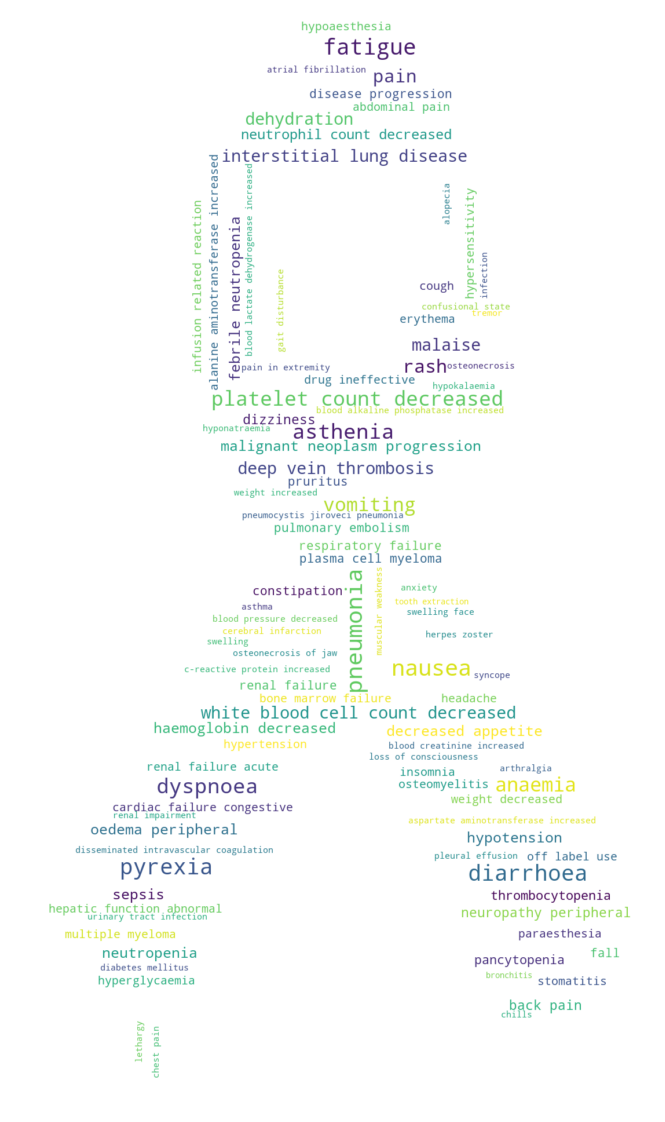

In [38]:
d = {}
for a, x in df_s[df_s['drugname']==out['drug'][0]]['pt'].value_counts().head(100).reset_index().values:
    d[a] = x

import requests
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#"http://www.pngall.com/breast-cancer-ribbon-png/download/18609"

mask = np.array(Image.open(requests.get("http://www.pngall.com/wp-content/uploads/2017/11/Breast-Cancer-Ribbon-PNG-File.png", stream=True).raw))
#mask = np.array(Image.open('mask.png'))
wordcloud = WordCloud(max_font_size=40, relative_scaling=0.5, width=800, height=400, mask=mask, background_color='white')
wordcloud.generate_from_frequencies(frequencies=d)
#plt.figure()
plt.figure(figsize=(50,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.savefig('foo.png')
plt.show()